IZENA:

ABIZENAK:

# Lurraren inguruan biraka dabilen satelite artifizialaren simulazioa

Praktika honetan, honako paketa kargatu behar da:

In [62]:
using Plots

Biraka dabilen satelite artifiziala lurraren erakarpen indarra jasaten du. Erakarpen horren eredu matematiko sinplifikatu bat kontsideratuko dugu. Kontutan hartuko dugu lurra erabat esferikoa ez dela, eta poloetan zapalduta dagoen elipsoide bat dela suposatuko dugu, masa dentsitate uniformea duena. Eredu matematiko honetan,
Bestalde, ilargia, eguzkia, eta gainerako astroen erakarpen indarra ez ditugu kontutan hartuko gure eredu matematikoan, ez eta ere atmosferaren erresistentzia.

Satelitearen kokapena $t$ unean zein den zehazteko, $(x(t),y(t),z(t))$ koordenatu kartesiarrak erabiliko ditugu, $(0,0,0)$ jatorria lurraren erdigunea delarik, eta ekuadorra XY planoan dagoelarik. Bestalde, $t$ uneko satelitearen abiadura $(v_x(t),v_y(t),v_z(t))$ adieraziko dugu.

 Gure eredu matematiko
sinplifikatuan, honako ekuazio diferentzialen sistema betetzen
da:

  \begin{align*}
 \frac{d x}{dt} &= v_x,\\
 \frac{d y}{dt} &= v_y,\\
 \frac{d z}{dt} &= v_z,\\
\frac{d v_x}{dt} &= -\mu \frac{x}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, F(x,y,z) \right),\\ 
\frac{d v_y}{dt} &= -\mu \frac{y}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, F(x,y,z) \right),\\ 
\frac{d v_z}{dt} &= -\mu \frac{z}{r(x,y,z)^3} \left(1 + \frac{\epsilon R^2}{r(x,y,z)^2}\, G(x,y,z) \right),
    \end{align*}
    
non $r(x,y,z)=\sqrt{x^2+y^2+z^2}$ satelitea eta lurraren erdigunearen arteko distantzia den,
\begin{equation}
\label{eq:rFG}
  F(x,y,z) = \frac{3}{2} -  \frac{15z^2}{2r(x,y,z)^2},  
  \quad G(x,y,z) = 3 + F(x,y,z),
\end{equation}
diren, eta 

- $\mu$ lurraren grabitate-konstantea den,

- $R$ lurraren erradioa den, eta

- $\epsilon$  lurraren poloetako zapaldura-koefizientea den.

Konkretuki, honako balioak ditugu,

\begin{equation*} 
    \mu = 398600.8 \, \mbox{Km}^3/\mbox{seg}^2, \quad R = 6\, 378.135\, \mbox{Km},  \quad               
    \epsilon = 0.0010826157.
\end{equation*}

- **¿Zein dira egoera aldagaiak?**

_Erantzuna hemen idatzi_


- **¿Zein dira problemaren parametro konstanteak?**

_Erantzuna hemen idatzi_

Jakina da goiko sistema modu trinkoan

\begin{equation*}
\frac{d}{dt} u = f(t,u,p). \hspace{7em} (1)
\end{equation*}

formatuan idatz daitekenergia1la, non $u$ egoera aldagaien bektorea den, eta $p$ problemaren parametro konstanteak biltzen dituen bektorea den.



- **Julia-n inplementatu $f$ funtzioa (sarrera argumentu gisa $t$ zenbakia, egoera aldagaien $u$ bektorea, eta parametro konstantenergia1n $p$ bektorea dituena, eta irtenergia1ra argumentu gisa sei osagaiko $du$ bektorea bueltatzen duena), satelitearen mugimenduaren ekuazio diferentzialen sistema (1) formatuan idazteko balio duena.**


In [63]:
function r(x,y,z)
    return sqrt(x^2 + y^2 + z^2)
end

r (generic function with 1 method)

In [64]:
function F(x, y,z) 
    return 3/2 - (15*z^2)/(2*r(x,y,z)^2)
end

F (generic function with 1 method)

In [65]:
function G(x,y,z)
    return 3 + F(x,y,z)
end    

G (generic function with 1 method)

In [66]:
function f(t,u,p)
    mu = p[1]
    R = p[2]
    eps = p[3]

    x = u[1]
    y = u[2]
    z = u[3]

    vx = u[4]
    vy = u[5]
    vz = u[6]
    
    dx = vx
    dy = vy
    dz = vz

    dvx = -mu * (x/r(x,y,z)^3) * (1 + eps*R^2/r(x,y,z)^2 * F(x,y,z))
    dvy = -mu * (y/r(x,y,z)^3) * (1 + eps*R^2/r(x,y,z)^2 * F(x,y,z))
    dvz = -mu * (z/r(x,y,z)^3) * (1 + eps*R^2/r(x,y,z)^2 * G(x,y,z))

    du = [dx, dy, dz, dvx, dvy, dvz]
    return du
end

f (generic function with 1 method)

Inplementatutako f funtzioa egiaztatzeko,   f(1.,[2.,3.,4.,5.,6.,7.],[8.,9.,10.]) balioztatu. Emaitza gisa, ondoko taula bueltatu beharko luke:
  [5.0, 6.0, 7.0, 7.44627, 11.1694, -2.2771]

In [67]:
f(1.,[2.,3.,4.,5.,6.,7.],[8.,9.,10.])

6-element Vector{Float64}:
  5.0
  6.0
  7.0
  7.446269613831889
 11.169404420747835
 -2.2771034556270133

Ikus daiteke satelitearen energia totala bere traiektorian zehar konstante mantentzen dela. Energia totala (energia zinetikoa gehi energia potentziala) eta satelitearen masaren arteko zatituta, honakoa da
\begin{equation*}
\frac12\, (v_x^2 + v_y^2+ z_z^2) - \frac{\mu}{r(x,y,z)}
-\frac{\mu \, R^2 \, \epsilon }{2\, 
   r(x,y,z)^3}+\frac{3 \,\mu \, R^2 \, z^2 \, \epsilon }{2\, r(x,y,z)^5}.
   \qquad (2)
\end{equation*}

Hemendik aurrera, esprezio honi, sistemaren energia deituko diogu. 

Ariketa honetan zehar, adibide gisa honako hasierako baldintzak hartuko ditugu, $t_0=0$, eta 
\begin{equation*}
  \begin{split}
 x(0) &=0\, \mbox{Km},\  \qquad y(0)=37947.73745727695 \, \mbox{Km},\\ 
 z(0)&=0\, \mbox{Km}, \quad v_x(0) =3.297676220718193 \, \mbox{Km/seg}, \\
 v_y(0)&=0\,  \mbox{Km/seg}, \quad v_z(0)=0.8244190551795483\,  \mbox{Km/seg}.
  \end{split}
\end{equation*}

- **Definitu satelitearen egoera jakin bakoitzerako energia kalkulatzen duen funtzioa.** Sarrera argumentu gisa, $u$ egoera bektorea eta $p$ parametro konstantenergia1n bektorea hartuko ditu, eta irtenergia1ran, zenbaki erreal bat bueltatuko du, hain zuzen, (2) espresioan definitutako energiaren balioa.

In [68]:
function Energia(u,p)
    mu = p[1]
    R = p[2]
    epsilon = p[3]

    x = u[1]
    y = u[2]
    z = u[3]

    vx = u[4]
    vy = u[5]
    vz = u[6]
    
    energia = 1/2*(vx^2 + vy^2 + vz^2) - mu/r(x,y,z) - mu*R^2*epsilon/(2*r(x,y,z)^3) + 3*mu*R^2*z^2*epsilon/(2*r(x,y,z)^5)
    return energia
end

Energia (generic function with 1 method)

- Zehaztutako parametro konstantenergia1n baliotarako, **kalkulatu goian finkatutako satelitearen hasierako balioei dagokien energiaren balioa.** Konprobazio gisa, emaitzak -4.726934129991156  eman beharko luke

In [69]:
mu = 398600.8
R = 6378.135 
epsilon = 0.0010826157
p = [mu, R, epsilon]

x = 0
y = 37947.73745727695
z = 0
vx = 3.297676220718193
vy = 0
vz = 0.8244190551795483

u0 = [x,y,z,vx,vy,vz]
Energia(u0,p)

-4.726934129991156

Lurra esferikoa izango balitz,  $\epsilon= 0$ izango genuke. Kasu horretan, goian emandako hasierako balio horiekin orbita eliptiko geosinkronoa izango genuke, hau da, orbita eliptiko periodiko
bat, bere T periodoa lurraren errotazio-periodoarekin bat datorrena, alegia, 23 ordu, 56
minutu, eta 4 segundu, hau da, 

\begin{equation*}
T = 86164 \, \mbox{seg}.
\end{equation*}

Gure ereduan, aldiz,  $\epsilon \neq 0$ daukagu (lurra erabat esferikoa ez dela kontutan hartzen ari garelako),  eta  orbita ez da erabat periodikoa, baina bai ia periodikoa ($T$ denbora pasa ondoren, ia aurreko egoerara bueltatzen da satelitea). 

Hasiera batean, gure helburua $[0,T]$ denbora tarteko hainbat $t$ unetan satelitearen kokapen eta abiadurak kalkulatzea izango da, konkretuki, 

\begin{equation*}
t=\frac{k \, T}{100}, \quad k=0,1,2,\ldots,100 \qquad (3)
\end{equation*}

unetarako. 

- Kalkuluak egitko lau ordenako Runge-Kutta metodo klasikoa (RK4). Horretarako, lab24 laborategian inplementatutako **EulerHobetua funtzioaren sarrera argumentu eta irtenergia1ra argumentu berak dituen funtzio bat sortu, lau ordenako Runge-Kutta metodoa inplementatzen duena**.

In [70]:
function RK4(u0, t0, T, n, p, f, m = 1)
    d = length(u0)
    tt = zeros(n+1)
    uu = zeros(n+1, d)
    tt[1] = t0
    uu[1, :] = u0
    tk = t0
    uk = u0
    h = (T-t0)/(n*m)
    for k=1:n
        for j=1:m
            k1 = h * f(tk, uk, p)
            k2 = h * f(tk + h/2, uk + 1/2*k1, p)
            k3 = h * f(tk + h/2, uk + 1/2*k2, p)
            k4 = h * f(tk + h, uk + k3, p)
            tk += h
            uk += 1/6*(k1 + 2*k2 + 2*k3 + k4)
        end
        tt[k+1] = tk
        uu[k+1, :] = uk
    end
    return tt, uu
end

RK4 (generic function with 2 methods)

- **RK4 metodoa aplikatu urrats luzera gisa $h=T/400$ erabiliz (3) unetarako satelitearen egoerak kalkulatzeko. Emaitza horietan oinarrituz, $x$, $y$, eta $z$ koordenatuen $[0,T]$ denbora tarteko eboluzioaren grafikoak irudi berean marraztu.**

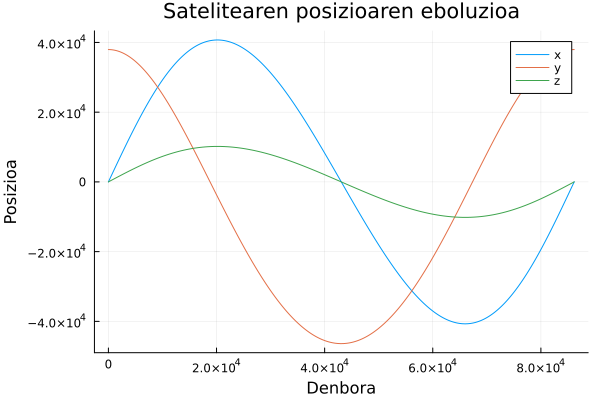

In [71]:
t0 = 0
T = 86164
n = 400
m = 4

tt, uu = RK4(u0, t0, T, n, p, f, m)

xx = uu[:, 1]
yy = uu[:, 2]
zz = uu[:, 3]

plot(tt, xx, title = "Satelitearen posizioaren eboluzioa", xlabel = "Denbora", ylabel = "Posizioa", label = "x")
plot!(tt, yy, label="y")
plot!(tt, zz, label="z")

- **Aurreko emaitzei dagokien sistemaren energiaren $[0,T]$ denbora tarteko eboluzioa irudikatu.**

In [74]:
function energia_taula(uu)
    energia1 = zeros(n + 1)
    for i in 1:n+1
        energia1[i] = Energia(uu[i, :], p)
        for j in 1:m
            i +=6
        end
    end
    return energia1
end

energia_taula (generic function with 1 method)

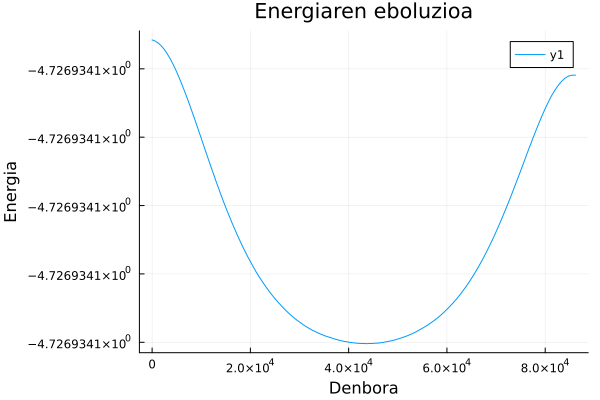

GKS: Possible loss of precision in routine SET_WINDOW


In [76]:
energia1 = energia_taula(uu)
plot(tt, energia1, title="Energiaren eboluzioa", xlabel = "Denbora", ylabel="Energia")

- Berez, sistemaren energia konstante mantendu beharko litzateke. Baina RK4-en metodoarekin lortutako emaitzetarako, ez da hala gertaten. **Zergaitik uste duzu gertatu dela hori?** 

_Soluzioa kalkulatzeko zenbakizko metodo bat erabili dugunez (RK4 metodoa), soluzioa zehazki ez dugulako kalkulatzen. Energiaren gorabeherak egindako errorearen isla dira._

- Sistemaren energiaren $t$ unean ($E(t)$) eta 0 unean ($E(0)$) berdina izan beharko luke. Aldiz, zenbakizko metodoarekin lortutako energiak ez dira berdinak. Bien arteko diferentzia erlatiboari $|E(t)-E(0)|/|E(0)|$ energia errorea deituko diogu. Ondoren (3) unetarako satelitearen egoerak kalkulatzeko RK4 metodoa aplikatuko dugu hiru modu desberdinetan: $h=T/400$ urrats luzerarekin, $h=T/800$ urrats luzerarekin, eta $h=T/1600$ urrats luzerarekin. **Irudi berean marraztu hiru zenbakizko hurbilpen horien energia errorenergia1n eboluzioa $[0,T]$ denbora tartean.**

In [78]:
energia1_err = abs.(energia1 .- energia1[1])./abs.(energia1[1])

n = 800
m = 8
tt2, uu2 = RK4(u0, t0, T, n, p, f, 8)
energia2 = energia_taula(uu2)
energia2_err = abs.(energia2 .- energia2[1])./abs.(energia2[1])
print(length(energia2_err))

n = 1600
m = 1
tt3, uu3 = RK4(u0, t0, T, n, p, f, 16)
energia3 = energia_taula(uu3)
energia3_err = abs.(energia3 .- energia3[1])./abs.(energia3[1])

plot(tt, energia1_err, title="Energien errorea", xlabel="Denbora", ylabel="Energia", label="h=T/400")
plot!(tt, energia2_err, label="h=T/800")
plot!(tt, energia3_err, label="h=T/1600")

801

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


- Urrats luzera txikitzean, energia errorea txikitu egiten da. **Urrats luzera zati bi egitean, zenbat txikitzen dira energia erroreak?**

Erroreak gutxi gorabehera zati 16 egiten dira, RK4 metodoa 4 ordenakoa baita.

- Energia erroreak gutxi gorabehera $h^4$-ren proportzionala diren ala ez egiaztatzeko, **grafikoki irudikatu, irudi berean, azkenengo hiru zenbakizko hurbilpenen (RK4 metodoarekin lortutakoen) energia erroreak zati $h^4$ ($h$, kasu bakoitzean erabilitako urrats luzera delarik).**

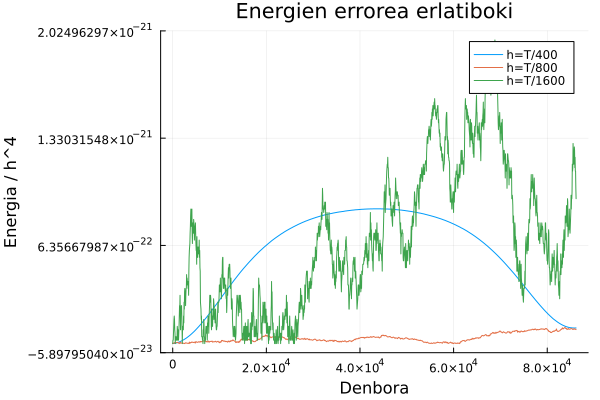

attempt to save state beyond implementation limit


In [80]:
plot(tt, energia1_err ./ (T/400)^4, title="Energien errorea erlatiboki", xlabel="Denbora", ylabel="Energia / h^4", label="h=T/400")
plot!(tt2, energia2_err ./ (T/800)^4, label="h=T/800")
plot!(tt3, energia3_err ./ (T/1600)^4, label="h=T/1600")

- **Hiru grafikoak antzekoak izan beharko lukete. Zergaitik?**

RK4 metodoa 4 ordenakoa delako

- Hiru grafikoak antzekoak ez badira, seinale RK4 metodoaren inplementazioa ez dela zuzena. Kasu horretan, bilatu egindako inplementazio errorea, zuzendu, eta hortik aurrerako kalkuluak errepikatu, hiru grafiko hauek antzekoak izan arte.

- Orain arte lortutako emaitza onenak erabiliz, **irudikatu $[0,T]$ denbora tarteko satelitearen orbitaren proiekzioa OXY planoan.**

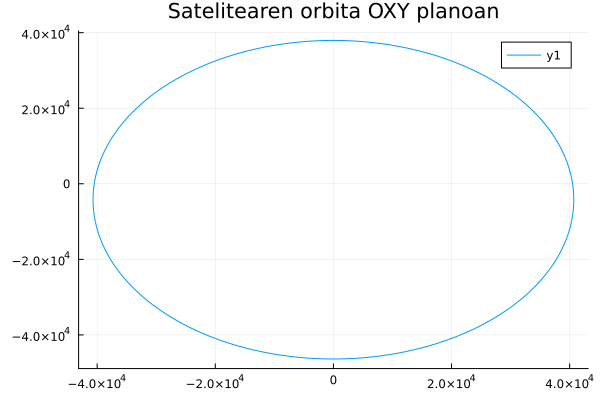

In [81]:
xx = uu3[:,1]
yy = uu3[:,2]
plot(xx, yy, title="Satelitearen orbita OXY planoan")

- Egindako kalkuluen fidagarritasuna aztertzeko, egindako erroreak estimatuko ditugu, horretarako aurretik kalkulatutako (3) unetarako bi hurbilpen desberdin erabiliko ditugularik: Bata, $h=T/800$ urrats luzerarekin, eta bestea $h=T/1600$ urrats luzerarekin. Bi hurbilpen horiek erabiliz, **hurbilpen onenaren erroreak estimatu, eta grafiko berean irudikatu $x$ koordenatuarekiko errorearen, $y$ koordenatuarekiko errorearen, eta $z$ koordenatuarekiko errorearen eboluzioak, (3) unetarako.**

In [90]:
xx2 = uu2[:,1]
yy2 = uu2[:,2]
zz2 = uu2[:,3]

xx3 = uu3[:,1]
yy3 = uu3[:,2]
zz3 = uu3[:,3]

xx4 = zeros(801)
yy4 = zeros(801)
zz4 = zeros(801)

for i in 1:801
    xx4[i] = abs(xx3[i] - xx2[i])
    yy4[i] = abs(yy3[i] - yy2[i])
    zz4[i] = abs(zz3[i] -  zz2[i])
end
plot(tt, xx4, title = "Erroreen eboluzioa", xlabel = "Denbora", ylabel = "Errorea", label = "x" )
plot!(tt, yy4, label = "y")
plot!(tt, zz4, label = "z")

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


- Orain demagun epe luzeragorako nahi dugula kalkulatu satelitearen egoera zein izango den,  konkretuki,  
\begin{equation*}
t=366\,j\, T, \quad j=1,2,\ldots,10 \qquad (4)
\end{equation*}
 unetarako. ($366T$ segundu gutxi gorabehera urtebete da. Beraz, urtetik urtera hamar urtez satelitearen egoera nola aldatzen den ikusi nahi dugu.) 
**RK4 metodoa aplikatu h=T/1600  urrats luzerarekin, (4) unetarako satelitearen egoera zein den kalkulatzeko.**

- Hamar urtenergia1tan zehar orbita nola aldatuko den ikusteko, (4) unetako bakoitzerako satelitearen egoeretatik abiatuz,  orbita bana marraztuko dugu: **RK4 metodoa $h=T/1600$ urrats luzerarekin aplikatuz, kalkulatu $j=0,1,\ldots,10$ bakoitzerako,  $[366\, j\, T,(366\, j +1)T]$ denbora tarteko $101$  unetarako satelitearen kokapenak. Eta irudi berean marraztu satelitearen orbita horietako bakoitzaren proiekzioa OXY planoan.**

Orbitari gertatzen zaion aldaketa horri, prezesioa deitzen zaio.

Emaitzen fidagarritasuna aztertzeko, egin diren erroreak estimatuko ditugu, horretarako, (4) unetarako bi hurbilpen desberdin erabiliko ditugularik: Bata, $h=T/800$ urrats luzerarekin, eta bestea $h=T/1600$ urrats luzerarekin. Bi hurbilpen horiek erabiliz, **hurbilpen onenaren erroreak estimatu, eta grafiko berean irudikatu $x$ koordenatuarekiko errorearen, $y$ koordenatuarekiko errorearen, eta $z$ koordenatuarekiko errorearen eboluzioak, (4) unetarako.**

- **Errorenergia1n tamainia ikusita, lortutako emaitzak fidagarriak direla uste al duzu? Konkretuki, urtez urtez ikusi dugun orbiten aldaketa benetakoa ote da, ala metodoaren errorenergia1n eraginez gertatuko ote zen?**

_Erantzun arrazoitua hemen idatzi_